### Model Designing

#### As the Dataset is large, to analyse the initial patterns and models in the data 2018 data has been selected.

In [1]:
import warnings
# Ignore the "deprecated" warning category
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("2018.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840217 entries, 0 to 3840216
Data columns (total 64 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   YEAR                     int64  
 1   MONTH                    int64  
 2   OP_UNIQUE_CARRIER        object 
 3   OP_CARRIER_FL_NUM        int64  
 4   ORIGIN_AIRPORT_ID        int64  
 5   ORIGIN                   object 
 6   ORIGIN_CITY_NAME         object 
 7   DEST_AIRPORT_ID          int64  
 8   DEST                     object 
 9   DEST_CITY_NAME           object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  DEP_DELAY_NEW            float64
 14  DEP_DEL15                float64
 15  DEP_DELAY_GROUP          float64
 16  DEP_TIME_BLK             object 
 17  TAXI_OUT                 float64
 18  WHEELS_OFF               float64
 19  WHEELS_ON                float64
 20  TAXI_IN                  float64
 21  CRS_ARR_

### Handling Network Dummy

In [4]:
df['OP_UNIQUE_CARRIER'].value_counts()

OP_UNIQUE_CARRIER
WN    1352552
DL     949282
AA     916818
UA     621565
Name: count, dtype: int64

HS - Hub and Spoke
PP - Point to Point 
These both are the widely used type of netwrks by the airline industry.

It is well know that Legacy carriers such as American Airlines(AA), Delta Airline(DL) and United Airlines(UA) use "Hub & Spoke" Network.
On the Otherhand, Southwest Airlines(WN) use "Point-to-Point" Network

In [5]:
for i in df.index:
    if df.loc[i,'OP_UNIQUE_CARRIER'] == 'AA' or df.loc[i,'OP_UNIQUE_CARRIER'] == 'DL' or df.loc[i,'OP_UNIQUE_CARRIER'] == 'UA':
        df.loc[i,'NETWORK'] = 'HS'
    else:
        df.loc[i,'NETWORK'] = 'PP'

In [6]:
df['NETWORK'].value_counts()

NETWORK
HS    2487665
PP    1352552
Name: count, dtype: int64

In [7]:
df['NETWORK'] = df['NETWORK'].map({'PP':0, 'HS':1})
df['NETWORK'].isna().sum()

np.int64(0)

### Handling Dep_Delay and Arr_Delay

In [8]:
df[['DEP_DELAY','ARR_DELAY']].describe()

,DEP_DELAY,ARR_DELAY
count,3.799811e+06,3.789888e+06
mean,9.796584e+00,3.740493e+00
std,3.961499e+01,4.189280e+01
min,-1.220000e+02,-1.200000e+02
25%,-4.000000e+00,-1.400000e+01
50%,-1.000000e+00,-6.000000e+00
75%,8.000000e+00,7.000000e+00
max,2.109000e+03,2.153000e+03


From the describe we can see that there are negative instances in the data. These negative instances indicate the early departure.

Replacing Nan with 0, because the blanks in Departure delay indicates that the filghts have been canceled. Zero doesn't have a value and will make sense for the data, as negative values indicare early departure and positive value indicated late departures. It is similar for the Arrival delay.

In [9]:
df['DEP_DELAY'] = df['DEP_DELAY'].replace(np.nan,0)
df['ARR_DELAY'] = df['ARR_DELAY'].replace(np.nan,0)

df[['DEP_DELAY','ARR_DELAY']].isna().sum()

DEP_DELAY    0
ARR_DELAY    0
dtype: int64

### Handling with Other Column's

These replaced with zero as the blanks are cancelled flights

In [10]:
df['TAXI_OUT'] = df['TAXI_OUT'].replace(np.nan,0)
df['TAXI_IN'] = df['TAXI_IN'].replace(np.nan,0)
df['ACTUAL_ELAPSED_TIME'] = df['ACTUAL_ELAPSED_TIME'].replace(np.nan,0)
df['AIR_TIME'] = df['AIR_TIME'].replace(np.nan,0)

df[['TAXI_OUT','TAXI_IN','ACTUAL_ELAPSED_TIME','AIR_TIME']].isna().sum()

TAXI_OUT               0
TAXI_IN                0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
dtype: int64

As per the data, the values in these columns are minutes. In other words, the number minuted taken by each type of delay. The blanks indicated that the delay occurred is not due to any of these reasons and hence Zero is being replaced.

In [11]:
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].replace(np.nan,0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].replace(np.nan,0)
df['NAS_DELAY'] = df['NAS_DELAY'].replace(np.nan,0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].replace(np.nan,0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].replace(np.nan,0)\

df[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].isna().sum()

CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

### Creation of KPI's

In [12]:
df['departure_delay_ratio'] = df['DEP_DELAY'] / df['CRS_ELAPSED_TIME']
df['flight_time_efficiency'] = df['AIR_TIME'] / df['CRS_ELAPSED_TIME']
df['congestion_origin'] = df.groupby(['ORIGIN_AIRPORT_ID', 'DEP_TIME_BLK'])['FLIGHTS'].transform('count')

df[['departure_delay_ratio','flight_time_efficiency','congestion_origin']].isna().sum()

departure_delay_ratio     0
flight_time_efficiency    0
congestion_origin         0
dtype: int64

### Handling the Columns to be drop

These Columns are dropped as they include descriptive information about flights origin and destination

In [13]:
columns = ['OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN','ORIGIN_CITY_NAME','DEST_AIRPORT_ID','DEST','DEST_CITY_NAME']
df.drop(columns, axis = 1, inplace = True)

These Columns are dropped as the data only includes 2019 January or they are already handled by creating dummy variable.

In [14]:
df.drop(['YEAR','MONTH','OP_UNIQUE_CARRIER','FLIGHTS'], axis = 1, inplace = True)

These columns are dropped as they are time related columns and are in the format of hhmm

In [15]:
cols = ['CRS_DEP_TIME','DEP_TIME','CRS_ARR_TIME','ARR_TIME','WHEELS_OFF','WHEELS_ON','FIRST_DEP_TIME']
df.drop(cols, axis = 1, inplace = True)

These are dropped because delay is represented in various formats of continuous and categorical variable

In [16]:
cols = ['DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP','ARR_DELAY_NEW','ARR_DEL15','ARR_DELAY_GROUP','DISTANCE_GROUP']
df.drop(cols, axis = 1, inplace = True)

These columns are dropped as our Target Variable is Arrival Delay. Those flights are either Cancelled or Divereted and hence are not required

In [17]:
cols = ['CANCELLED','CANCELLATION_CODE','DIVERTED','DIV_AIRPORT_LANDINGS','DIV_REACHED_DEST','DIV_ACTUAL_ELAPSED_TIME','DIV_ARR_DELAY','DIV_DISTANCE',
        'DIV1_AIRPORT','DIV1_AIRPORT_ID','DIV1_WHEELS_ON','DIV1_TOTAL_GTIME','DIV1_LONGEST_GTIME','DIV1_WHEELS_OFF','DIV1_TAIL_NUM','DIV2_AIRPORT',
        'DIV2_AIRPORT_ID','DIV2_WHEELS_ON','DIV2_TOTAL_GTIME','DIV2_LONGEST_GTIME','DIV2_WHEELS_OFF','DIV2_TAIL_NUM','TOTAL_ADD_GTIME',
        'LONGEST_ADD_GTIME']
df.drop(cols, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840217 entries, 0 to 3840216
Data columns (total 19 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DEP_DELAY               float64
 1   DEP_TIME_BLK            object 
 2   TAXI_OUT                float64
 3   TAXI_IN                 float64
 4   ARR_DELAY               float64
 5   ARR_TIME_BLK            object 
 6   CRS_ELAPSED_TIME        int64  
 7   ACTUAL_ELAPSED_TIME     float64
 8   AIR_TIME                float64
 9   DISTANCE                int64  
 10  CARRIER_DELAY           float64
 11  WEATHER_DELAY           float64
 12  NAS_DELAY               float64
 13  SECURITY_DELAY          float64
 14  LATE_AIRCRAFT_DELAY     float64
 15  NETWORK                 int64  
 16  departure_delay_ratio   float64
 17  flight_time_efficiency  float64
 18  congestion_origin       int64  
dtypes: float64(13), int64(4), object(2)
memory usage: 556.7+ MB


### Handling Dep_time_blk

In [18]:
df_blk = pd.get_dummies(df['DEP_TIME_BLK'], prefix = 'Dep')
df[df_blk.columns] = df_blk
df.drop('DEP_TIME_BLK', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840217 entries, 0 to 3840216
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DEP_DELAY               float64
 1   TAXI_OUT                float64
 2   TAXI_IN                 float64
 3   ARR_DELAY               float64
 4   ARR_TIME_BLK            object 
 5   CRS_ELAPSED_TIME        int64  
 6   ACTUAL_ELAPSED_TIME     float64
 7   AIR_TIME                float64
 8   DISTANCE                int64  
 9   CARRIER_DELAY           float64
 10  WEATHER_DELAY           float64
 11  NAS_DELAY               float64
 12  SECURITY_DELAY          float64
 13  LATE_AIRCRAFT_DELAY     float64
 14  NETWORK                 int64  
 15  departure_delay_ratio   float64
 16  flight_time_efficiency  float64
 17  congestion_origin       int64  
 18  Dep_0001-0559           bool   
 19  Dep_0600-0659           bool   
 20  Dep_0700-0759           bool   
 21  Dep_0800-0859           bool   

### Handling Arr_time_blk

In [19]:
df_arr = pd.get_dummies(df['ARR_TIME_BLK'], prefix = 'Arr')
df[df_arr.columns] = df_arr
df.drop('ARR_TIME_BLK', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840217 entries, 0 to 3840216
Data columns (total 55 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DEP_DELAY               float64
 1   TAXI_OUT                float64
 2   TAXI_IN                 float64
 3   ARR_DELAY               float64
 4   CRS_ELAPSED_TIME        int64  
 5   ACTUAL_ELAPSED_TIME     float64
 6   AIR_TIME                float64
 7   DISTANCE                int64  
 8   CARRIER_DELAY           float64
 9   WEATHER_DELAY           float64
 10  NAS_DELAY               float64
 11  SECURITY_DELAY          float64
 12  LATE_AIRCRAFT_DELAY     float64
 13  NETWORK                 int64  
 14  departure_delay_ratio   float64
 15  flight_time_efficiency  float64
 16  congestion_origin       int64  
 17  Dep_0001-0559           bool   
 18  Dep_0600-0659           bool   
 19  Dep_0700-0759           bool   
 20  Dep_0800-0859           bool   
 21  Dep_0900-0959           bool   

### Partition of Data

In [20]:
X = df.drop('ARR_DELAY', axis = 1)
y = df['ARR_DELAY']

In [21]:
from sklearn.model_selection import train_test_split

X_train_org,X_test_org,y_train,y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
X_train_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3072173 entries, 1463146 to 305711
Data columns (total 54 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   DEP_DELAY               float64
 1   TAXI_OUT                float64
 2   TAXI_IN                 float64
 3   CRS_ELAPSED_TIME        int64  
 4   ACTUAL_ELAPSED_TIME     float64
 5   AIR_TIME                float64
 6   DISTANCE                int64  
 7   CARRIER_DELAY           float64
 8   WEATHER_DELAY           float64
 9   NAS_DELAY               float64
 10  SECURITY_DELAY          float64
 11  LATE_AIRCRAFT_DELAY     float64
 12  NETWORK                 int64  
 13  departure_delay_ratio   float64
 14  flight_time_efficiency  float64
 15  congestion_origin       int64  
 16  Dep_0001-0559           bool   
 17  Dep_0600-0659           bool   
 18  Dep_0700-0759           bool   
 19  Dep_0800-0859           bool   
 20  Dep_0900-0959           bool   
 21  Dep_1000-1059           bool   

### Scaling of Data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_columns =['DEP_DELAY','TAXI_OUT', 'TAXI_IN', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
                 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'departure_delay_ratio', 'flight_time_efficiency', 'congestion_origin']

unscaled_columns = ['NETWORK','Dep_0001-0559', 'Dep_0600-0659', 'Dep_0700-0759', 'Dep_0800-0859', 'Dep_0900-0959', 'Dep_1000-1059', 'Dep_1100-1159', 
           'Dep_1200-1259', 'Dep_1300-1359', 'Dep_1400-1459', 'Dep_1500-1559', 'Dep_1600-1659', 'Dep_1700-1759', 'Dep_1800-1859', 'Dep_1900-1959', 
           'Dep_2000-2059', 'Dep_2100-2159', 'Dep_2200-2259', 'Dep_2300-2359','Arr_0001-0559', 'Arr_0600-0659', 'Arr_0700-0759', 'Arr_0800-0859', 
           'Arr_0900-0959', 'Arr_1000-1059', 'Arr_1100-1159', 'Arr_1200-1259', 'Arr_1300-1359', 'Arr_1400-1459', 'Arr_1500-1559', 'Arr_1600-1659', 
           'Arr_1700-1759', 'Arr_1800-1859', 'Arr_1900-1959', 'Arr_2000-2059', 'Arr_2100-2159', 'Arr_2200-2259', 'Arr_2300-2359']

scaler.fit(X_train_org[scaled_columns])

X_scaled = pd.concat([pd.DataFrame(scaler.transform(X[scaled_columns]), columns = scaled_columns),X[unscaled_columns]], axis = 1)

X_train = X_scaled.iloc[X_train_org.index]
X_test = X_scaled.iloc[X_test_org.index]

In [23]:
X_train.isna().sum().sum()

np.int64(0)

In [24]:
X_test.isna().sum().sum()

np.int64(0)

## Model's

### Simple Linear Regression - Network

In [25]:
X_SLR = X_scaled['NETWORK']

In [26]:
import statsmodels.api as sm

x = sm.add_constant(X_SLR)
SLR = sm.OLS(y,x).fit()

In [27]:
SLR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS              Adj. R-squared:     0.000        
Dependent Variable: ARR_DELAY        AIC:                39534410.2567
Date:               2025-05-11 14:38 BIC:                39534436.5788
No. Observations:   3840217          Log-Likelihood:     -1.9767e+07  
Df Model:           1                F-statistic:        693.0        
Df Residuals:       3840215          Prob (F-statistic): 1.01e-152    
R-squared:          0.000            Scale:              1731.9       
------------------------------------------------------------------------
               Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
------------------------------------------------------------------------
const          4.4497     0.0358   124.3500   0.0000    4.3795    4.5198
NETWORK       -1.1704     0.0445   -26.3257   0.0000   -1.2576   -1.0833
----------------------------------------------------------------------
Omnibus:            5491393.418    Durbin-Watson:       1.378         
Prob(Omnibus):      0.000          Jarque-Bera (JB):    3556998523.884
Skew:               8.317          Prob(JB):            0.000         
Kurtosis:           151.166        Condition No.:       3             
======================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

From the above report, we can say that the predictor Netwrok is significant in the regression model and has a linear relation with Arrival Delay. But the R-squared values is too less and hence we can conclude that Network alone is an insufficient predictor to understand the Arrival delay.

### Mutiple Linear Regression - Network + Dep_time_blk

In [28]:
columns = ['NETWORK','Dep_0001-0559', 'Dep_0600-0659', 'Dep_0700-0759', 'Dep_0800-0859', 'Dep_0900-0959', 'Dep_1000-1059', 'Dep_1100-1159', 
           'Dep_1200-1259', 'Dep_1300-1359', 'Dep_1400-1459', 'Dep_1500-1559', 'Dep_1600-1659', 'Dep_1700-1759', 'Dep_1800-1859', 'Dep_1900-1959', 
           'Dep_2000-2059', 'Dep_2100-2159', 'Dep_2200-2259', 'Dep_2300-2359']
X_reg = X_scaled[columns]

In [29]:
x1 = sm.add_constant(X_reg)
model = sm.OLS(y,x1.astype(float)).fit()

In [30]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Ordinary least squares
=================================================================================================
Model:                       OLS                       Adj. R-squared:              0.015        
Dependent Variable:          ARR_DELAY                 AIC:                         39475422.7259
Date:                        2025-05-11 14:39          BIC:                         39475699.1078
No. Observations:            3840217                   Log-Likelihood:              -1.9738e+07  
Df Model:                    20                        F-statistic:                 3009.        
Df Residuals:                3840196                   Prob (F-statistic):          0.00         
R-squared:                   0.015                     Scale:                       1705.5       
-------------------------------------------------------------------------------------------------
                   Coef.           Std.Err.       t     P>|t|        [0.025           0.975]     
-------------------------------------------------------------------------------------------------
const          2060116016.1376 6890748593.4666   0.2990 0.7650 -11445507310.3206 15565739342.5958
NETWORK                -0.9309          0.0442 -21.0489 0.0000           -1.0176          -0.8443
Dep_0001-0559 -2060116020.5223 6890748593.5027  -0.2990 0.7650 -15565739347.0512 11445507306.0067
Dep_0600-0659 -2060116019.9414 6890748593.4853  -0.2990 0.7650 -15565739346.4361 11445507306.5533
Dep_0700-0759 -2060116018.1692 6890748593.4910  -0.2990 0.7650 -15565739344.6751 11445507308.3367
Dep_0800-0859 -2060116017.3093 6890748593.4742  -0.2990 0.7650 -15565739343.7824 11445507309.1639
Dep_0900-0959 -2060116016.2542 6890748593.4270  -0.2990 0.7650 -15565739342.6347 11445507310.1264
Dep_1000-1059 -2060116015.0871 6890748593.4690  -0.2990 0.7650 -15565739341.5499 11445507311.3758
Dep_1100-1159 -2060116014.1927 6890748593.4767  -0.2990 0.7650 -15565739340.6706 11445507312.2853
Dep_1200-1259 -2060116012.3954 6890748593.4311  -0.2990 0.7650 -15565739338.7840 11445507313.9933
Dep_1300-1359 -2060116011.2860 6890748593.4736  -0.2990 0.7650 -15565739337.7579 11445507315.1859
Dep_1400-1459 -2060116009.5655 6890748593.4395  -0.2990 0.7650 -15565739335.9704 11445507316.8395
Dep_1500-1559 -2060116008.3836 6890748593.4748  -0.2990 0.7650 -15565739334.8579 11445507318.0907
Dep_1600-1659 -2060116007.3028 6890748593.4705  -0.2990 0.7650 -15565739333.7686 11445507319.1631
Dep_1700-1759 -2060116006.2146 6890748593.4338  -0.2990 0.7650 -15565739332.6084 11445507320.1792
Dep_1800-1859 -2060116004.6367 6890748593.4945  -0.2990 0.7650 -15565739331.1496 11445507321.8762
Dep_1900-1959 -2060116005.2444 6890748593.4668  -0.2990 0.7650 -15565739331.7029 11445507321.2140
Dep_2000-2059 -2060116005.2461 6890748593.4698  -0.2990 0.7650 -15565739331.7106 11445507321.2183
Dep_2100-2159 -2060116007.4955 6890748593.4576  -0.2990 0.7650 -15565739333.9361 11445507318.9451
Dep_2200-2259 -2060116008.4748 6890748593.4689  -0.2990 0.7650 -15565739334.9374 11445507317.9877
Dep_2300-2359 -2060116012.7489 6890748593.4637  -0.2990 0.7650 -15565739339.2014 11445507313.7036
-------------------------------------------------------------------------------------------------
Omnibus:                     5526221.730             Durbin-Watson:                1.393         
Prob(Omnibus):               0.000                   Jarque-Bera (JB):             3734049840.459
Skew:                        8.409                   Prob(JB):                     0.000         
Kurtosis:                    154.834                 Condition No.:                1820456209029 
=================================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-18. This might indicate tha

From this output we can say that, none of the Depature time Blocks are significant and hence do not provide information relating to Arrival Delay.

### Multiple Linear Regression - Network + Dep_time_blk + Arr_time_blk

In [31]:
columns = ['NETWORK','Dep_0001-0559', 'Dep_0600-0659', 'Dep_0700-0759', 'Dep_0800-0859', 'Dep_0900-0959', 'Dep_1000-1059', 'Dep_1100-1159', 
           'Dep_1200-1259', 'Dep_1300-1359', 'Dep_1400-1459', 'Dep_1500-1559', 'Dep_1600-1659', 'Dep_1700-1759', 'Dep_1800-1859', 'Dep_1900-1959', 
           'Dep_2000-2059', 'Dep_2100-2159', 'Dep_2200-2259', 'Dep_2300-2359','Arr_0001-0559', 'Arr_0600-0659', 'Arr_0700-0759', 'Arr_0800-0859', 
           'Arr_0900-0959', 'Arr_1000-1059', 'Arr_1100-1159', 'Arr_1200-1259', 'Arr_1300-1359', 'Arr_1400-1459', 'Arr_1500-1559', 'Arr_1600-1659', 
           'Arr_1700-1759', 'Arr_1800-1859', 'Arr_1900-1959', 'Arr_2000-2059', 'Arr_2100-2159', 'Arr_2200-2259', 'Arr_2300-2359']
X_reg_2 = X_scaled[columns]

In [32]:
x2 = sm.add_constant(X_reg_2)
model_2 = sm.OLS(y,x2.astype(float)).fit()

In [33]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Ordinary least squares
==================================================================================================
Model:                        OLS                       Adj. R-squared:              0.016        
Dependent Variable:           ARR_DELAY                 AIC:                         39472358.2000
Date:                         2025-05-11 14:39          BIC:                         39472884.6416
No. Observations:             3840217                   Log-Likelihood:              -1.9736e+07  
Df Model:                     39                        F-statistic:                 1624.        
Df Residuals:                 3840177                   Prob (F-statistic):          0.00         
R-squared:                    0.016                     Scale:                       1704.1       
--------------------------------------------------------------------------------------------------
                   Coef.           Std.Err.        t     P>|t|        [0.025           0.975]     
--------------------------------------------------------------------------------------------------
const           166914877.7493 13544332435.5588   0.0123 0.9902 -26379497257.6043 26713327013.1028
NETWORK                -1.0598           0.0445 -23.8223 0.0000           -1.1469          -0.9726
Dep_0001-0559 -2065995224.0550  6888088621.5294  -0.2999 0.7642 -15566405099.6942 11434414651.5843
Dep_0600-0659 -2065995223.7826  6888088621.5119  -0.2999 0.7642 -15566405099.3876 11434414651.8224
Dep_0700-0759 -2065995222.2195  6888088621.5177  -0.2999 0.7642 -15566405097.8357 11434414653.3967
Dep_0800-0859 -2065995221.3715  6888088621.5009  -0.2999 0.7642 -15566405096.9549 11434414654.2119
Dep_0900-0959 -2065995220.4248  6888088621.4537  -0.2999 0.7642 -15566405095.9157 11434414655.0660
Dep_1000-1059 -2065995219.4475  6888088621.4957  -0.2999 0.7642 -15566405095.0206 11434414656.1257
Dep_1100-1159 -2065995218.9640  6888088621.5034  -0.2999 0.7642 -15566405094.5522 11434414656.6242
Dep_1200-1259 -2065995217.8045  6888088621.4578  -0.2999 0.7642 -15566405093.3035 11434414657.6945
Dep_1300-1359 -2065995217.6554  6888088621.5003  -0.2999 0.7642 -15566405093.2376 11434414657.9268
Dep_1400-1459 -2065995216.8067  6888088621.4662  -0.2999 0.7642 -15566405092.3221 11434414658.7086
Dep_1500-1559 -2065995216.8172  6888088621.5015  -0.2999 0.7642 -15566405092.4018 11434414658.7674
Dep_1600-1659 -2065995216.5843  6888088621.4972  -0.2999 0.7642 -15566405092.1604 11434414658.9918
Dep_1700-1759 -2065995215.6905  6888088621.4605  -0.2999 0.7642 -15566405091.1947 11434414659.8136
Dep_1800-1859 -2065995213.9196  6888088621.5212  -0.2999 0.7642 -15566405089.5428 11434414661.7035
Dep_1900-1959 -2065995214.3835  6888088621.4934  -0.2999 0.7642 -15566405089.9522 11434414661.1853
Dep_2000-2059 -2065995214.1573  6888088621.4965  -0.2999 0.7642 -15566405089.7321 11434414661.4174
Dep_2100-2159 -2065995215.9878  6888088621.4843  -0.2999 0.7642 -15566405091.5388 11434414659.5631
Dep_2200-2259 -2065995215.8731  6888088621.4955  -0.2999 0.7642 -15566405091.4460 11434414659.6998
Dep_2300-2359 -2065995217.9728  6888088621.4904  -0.2999 0.7642 -15566405093.5356 11434414657.5900
Arr_0001-0559  1899080345.6912 11663461428.8669   0.1628 0.8707 -20960891195.0713 24759051886.4536
Arr_0600-0659  1899080341.0134 11663461428.8901   0.1628 0.8707 -20960891199.7945 24759051881.8213
Arr_0700-0759  1899080341.8050 11663461428.8625   0.1628 0.8707 -20960891198.9488 24759051882.5588
Arr_0800-0859  1899080342.5645 11663461428.9845   0.1628 0.8707 -20960891198.4286 24759051883.5575
Arr_0900-0959  1899080342.7166 11663461428.9171   0.1628 0.8707 -20960891198.1442 24759051883.5774
Arr_1000-1059  1899080342.0892 11663461428.9608   0.1628 0.8707 -20960891198.8574 24759051883.0358
Arr_1100-1159  1899080342.4756 11663461428.9207   0.1628 0.8707 -20960891198.3922 24759051883.3435
Arr_1200-1259  1899080342

From this output, we say that neither departure time block or arrival time block are significant and provide any necessary information for the Arrival Delay.

### Multiple Linear Regression

In [34]:
matrix = X_scaled.corr()
for i in matrix.index:
    for j in matrix.columns:
        if (np.abs(matrix.loc[i,j]) >= 0.7) and (np.abs(matrix.loc[i,j]) < 1.0):
            print(i,j)

DEP_DELAY departure_delay_ratio
CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME
CRS_ELAPSED_TIME AIR_TIME
CRS_ELAPSED_TIME DISTANCE
ACTUAL_ELAPSED_TIME CRS_ELAPSED_TIME
ACTUAL_ELAPSED_TIME AIR_TIME
ACTUAL_ELAPSED_TIME DISTANCE
AIR_TIME CRS_ELAPSED_TIME
AIR_TIME ACTUAL_ELAPSED_TIME
AIR_TIME DISTANCE
DISTANCE CRS_ELAPSED_TIME
DISTANCE ACTUAL_ELAPSED_TIME
DISTANCE AIR_TIME
departure_delay_ratio DEP_DELAY


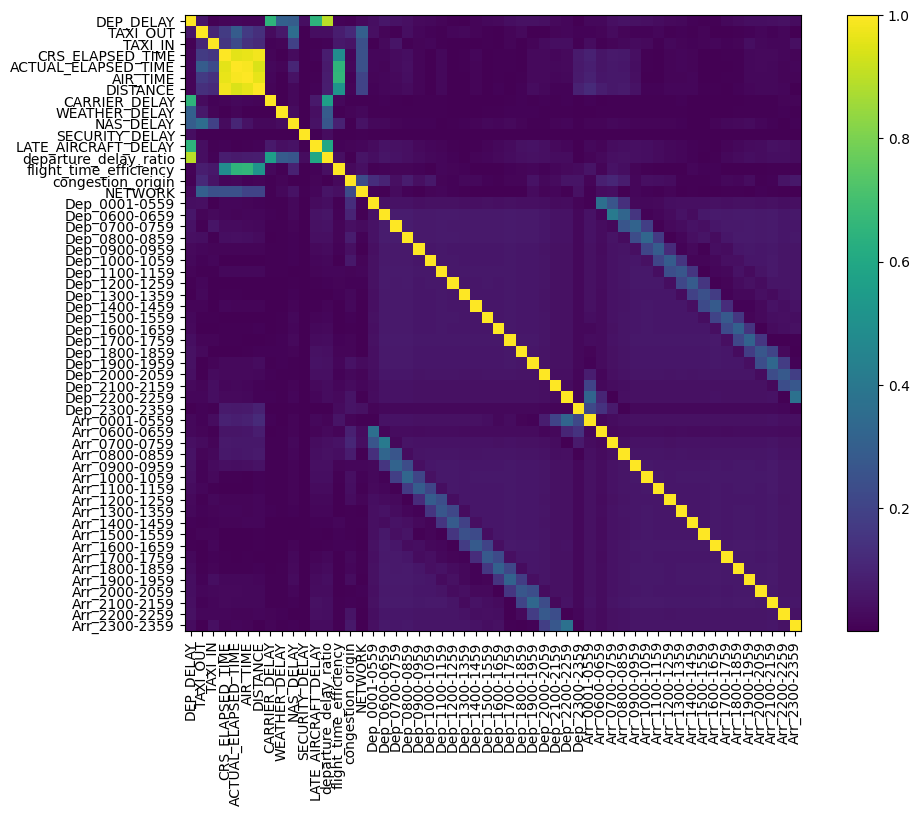

In [35]:
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(matrix))
plt.colorbar()
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation = 90)
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.show()

Removing the columns as per dictionary order for those there exists strong collinearity between these columns

In [36]:
X_MLR = X_scaled.drop(['CRS_ELAPSED_TIME','departure_delay_ratio','ACTUAL_ELAPSED_TIME','AIR_TIME'], axis = 1)

In [37]:
x3 = sm.add_constant(X_MLR)
MLR = sm.OLS(y,x3.astype(float)).fit()

In [38]:
MLR.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Ordinary least squares
===================================================================================================================
Model:                             OLS                             Adj. R-squared:                    0.958        
Dependent Variable:                ARR_DELAY                       AIC:                               27394996.8850
Date:                              2025-05-11 14:41                BIC:                               27395641.7759
No. Observations:                  3840217                         Log-Likelihood:                    -1.3697e+07  
Df Model:                          48                              F-statistic:                       1.808e+06    
Df Residuals:                      3840168                         Prob (F-statistic):                0.00         
R-squared:                         0.958                           Scale:                             73.392       
-------------------------------------------------------------------------------------------------------------------
                             Coef.             Std.Err.         t     P>|t|         [0.025             0.975]      
-------------------------------------------------------------------------------------------------------------------
const                   419289985186.9248 509787811741.7700    0.8225 0.4108  -579876080506.9366 1418456050880.7861
DEP_DELAY                         17.8187            0.0180  988.3868 0.0000             17.7833            17.8540
TAXI_OUT                           4.3128            0.0053  817.8378 0.0000              4.3025             4.3231
TAXI_IN                            2.4855            0.0048  519.7608 0.0000              2.4761             2.4948
DISTANCE                          -3.0512            0.0058 -530.1380 0.0000             -3.0625            -3.0399
CARRIER_DELAY                     13.2346            0.0118 1118.7889 0.0000             13.2114            13.2578
WEATHER_DELAY                      6.1389            0.0067  919.2948 0.0000              6.1258             6.1520
NAS_DELAY                          8.7928            0.0071 1235.8217 0.0000              8.7789             8.8068
SECURITY_DELAY                     0.8119            0.0045  180.9068 0.0000              0.8031             0.8207
LATE_AIRCRAFT_DELAY               12.3872            0.0113 1095.7663 0.0000             12.3650            12.4094
flight_time_efficiency             2.6539            0.0053  497.6957 0.0000              2.6435             2.6644
congestion_origin                  0.2954            0.0047   62.9966 0.0000              0.2862             0.3046
NETWORK                           -3.8787            0.0105 -368.1491 0.0000             -3.8993            -3.8580
Dep_0001-0559           -51704147229.6017 313345341806.9097   -0.1650 0.8689  -665849925464.2902  562441631005.0868
Dep_0600-0659           -51704147229.5249 313345341806.9150   -0.1650 0.8689  -665849925464.2239  562441631005.1741
Dep_0700-0759           -51704147229.1584 313345341806.9260   -0.1650 0.8689  -665849925463.8788  562441631005.5621
Dep_0800-0859           -51704147229.2875 313345341806.9163   -0.1650 0.8689  -665849925463.9888  562441631005.4138
Dep_0900-0959           -51704147228.7353 313345341806.9139   -0.1650 0.8689  -665849925463.4320  562441631005.9615
Dep_1000-1059           -51704147228.5800 313345341806.9149   -0.1650 0.8689  -665849925463.2787  562441631006.1188
Dep_1100-1159           -51704147228.6358 313345341806.9189   -0.1650 0.8689  -665849925463.3424  562441631006.0707
Dep_1200-1259           -51704147228.1569 313345341806.9132   -0.1650 0.8689  -665849925462.8523  562441631006.5383
Dep_1300-1359           -51704147228.1873 313345341806.9170   -0.1650 0.8689  -665849925462.8900  562441631006.5155
Dep_1400-1459           -51704147228.0062 3133453

As per the report none of the time blocks are significant. Hence, to be removed.

In [39]:
columns = ['Dep_0001-0559', 'Dep_0600-0659', 'Dep_0700-0759', 'Dep_0800-0859', 'Dep_0900-0959', 'Dep_1000-1059', 'Dep_1100-1159','Dep_1200-1259', 
           'Dep_1300-1359', 'Dep_1400-1459', 'Dep_1500-1559', 'Dep_1600-1659', 'Dep_1700-1759', 'Dep_1800-1859', 'Dep_1900-1959','Dep_2000-2059', 
           'Dep_2100-2159', 'Dep_2200-2259', 'Dep_2300-2359','Arr_0001-0559', 'Arr_0600-0659', 'Arr_0700-0759', 'Arr_0800-0859', 'Arr_0900-0959', 
           'Arr_1000-1059', 'Arr_1100-1159', 'Arr_1200-1259', 'Arr_1300-1359', 'Arr_1400-1459', 'Arr_1500-1559', 'Arr_1600-1659', 'Arr_1700-1759', 
           'Arr_1800-1859', 'Arr_1900-1959', 'Arr_2000-2059', 'Arr_2100-2159', 'Arr_2200-2259', 'Arr_2300-2359']
X_MLR.drop(columns, axis = 1, inplace = True)

In [40]:
x4 = sm.add_constant(X_MLR)
MLR_1 = sm.OLS(y,x4.astype(float)).fit()

In [41]:
MLR_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                OLS              Adj. R-squared:     0.957        
Dependent Variable:   ARR_DELAY        AIC:                27416383.7069
Date:                 2025-05-11 14:42 BIC:                27416554.8004
No. Observations:     3840217          Log-Likelihood:     -1.3708e+07  
Df Model:             12               F-statistic:        7.191e+06    
Df Residuals:         3840204          Prob (F-statistic): 0.00         
R-squared:            0.957            Scale:              73.803       
------------------------------------------------------------------------
                        Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
const                   6.1787   0.0081  763.8021 0.0000  6.1628  6.1945
DEP_DELAY              17.9455   0.0179 1000.7501 0.0000 17.9104 17.9806
TAXI_OUT                4.2903   0.0053  815.2516 0.0000  4.2799  4.3006
TAXI_IN                 2.4495   0.0047  515.7834 0.0000  2.4402  2.4588
DISTANCE               -3.0337   0.0054 -560.3664 0.0000 -3.0443 -3.0231
CARRIER_DELAY          13.1659   0.0118 1116.2769 0.0000 13.1428 13.1890
WEATHER_DELAY           6.1108   0.0067  915.8323 0.0000  6.0977  6.1239
NAS_DELAY               8.7844   0.0071 1234.0080 0.0000  8.7704  8.7983
SECURITY_DELAY          0.8075   0.0045  179.5076 0.0000  0.7987  0.8163
LATE_AIRCRAFT_DELAY    12.3606   0.0113 1093.0995 0.0000 12.3385 12.3828
flight_time_efficiency  2.6378   0.0053  494.7016 0.0000  2.6274  2.6483
congestion_origin       0.2826   0.0046   62.0799 0.0000  0.2736  0.2915
NETWORK                -3.8344   0.0105 -365.3230 0.0000 -3.8550 -3.8138
------------------------------------------------------------------------
Omnibus:             1448008.700     Durbin-Watson:        1.296        
Prob(Omnibus):       0.000           Jarque-Bera (JB):     206514851.178
Skew:                -0.764          Prob(JB):             0.000        
Kurtosis:            38.893          Condition No.:        8            
========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""

From the above report, it is clear that the all other remaining predictors are significant and can be used for further analysis.

### Step-wise Regression

#### USING the above predictors to run linear regression model

In [42]:
columns = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'NETWORK',
       'departure_delay_ratio', 'flight_time_efficiency', 'congestion_origin',
       'Dep_0001-0559', 'Dep_0600-0659', 'Dep_0700-0759', 'Dep_0800-0859',
       'Dep_0900-0959', 'Dep_1000-1059', 'Dep_1100-1159', 'Dep_1300-1359',
       'Dep_1400-1459', 'Dep_1500-1559', 'Dep_1600-1659', 'Dep_1700-1759',
       'Dep_1800-1859', 'Dep_1900-1959', 'Dep_2000-2059', 'Dep_2100-2159',
       'Dep_2200-2259', 'Arr_0001-0559', 'Arr_0600-0659', 'Arr_0700-0759',
       'Arr_0800-0859', 'Arr_0900-0959', 'Arr_1000-1059', 'Arr_1100-1159',
       'Arr_1200-1259', 'Arr_1300-1359', 'Arr_1500-1559', 'Arr_1600-1659',
       'Arr_1700-1759', 'Arr_1800-1859', 'Arr_1900-1959', 'Arr_2000-2059',
       'Arr_2100-2159', 'Arr_2200-2259', 'Arr_2300-2359']
X_train_sfs = X_train[columns]
X_test_sfs = X_test[columns]

In [43]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train_sfs,y_train)

print("Train Score:", lreg.score(X_train_sfs,y_train))
print("Test Score:", lreg.score(X_test_sfs,y_test))

Train Score: 0.9614276188116075
Test Score: 0.9620690206399737


In [44]:
lreg.coef_

array([ 18.98483594,   4.23617837,   2.5160385 , -19.88710268,
         5.95136028,  11.97188542,  12.40823094,   5.76410591,
         8.25134187,   0.76048776,  11.60978756,  -2.78498376,
         0.19350246,   0.89683603,   0.12633988,  -1.48886433,
        -2.1958709 ,  -2.05033689,  -2.13361525,  -1.7840776 ,
        -1.19819878,  -0.68288943,   0.41337785,   0.96966977,
         1.04480786,   1.7001279 ,   1.77445991,   2.16325099,
         2.38355455,   2.70217239,   2.50861809,   2.61400451,
        -3.64868259,  -1.70308213,   0.88592663,   1.50498344,
         1.6227178 ,   1.5361472 ,   1.17732488,   0.7013783 ,
         0.28331984,  -0.26225356,  -0.82491253,  -0.90127927,
        -1.15764949,  -1.49665294,  -1.91739849,  -2.19181599,
        -2.68459715,  -3.00822668])

#### USING the above predictors to run Decision Tree regressor model

In [45]:
from sklearn.tree import DecisionTreeRegressor

train = []
test = []
index = []

for i in range(2,20):
    dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = i)
    dt_reg.fit(X_train_sfs, y_train)
    train.append(dt_reg.score(X_train_sfs, y_train))
    test.append(dt_reg.score(X_test_sfs, y_test))
    index.append(i)

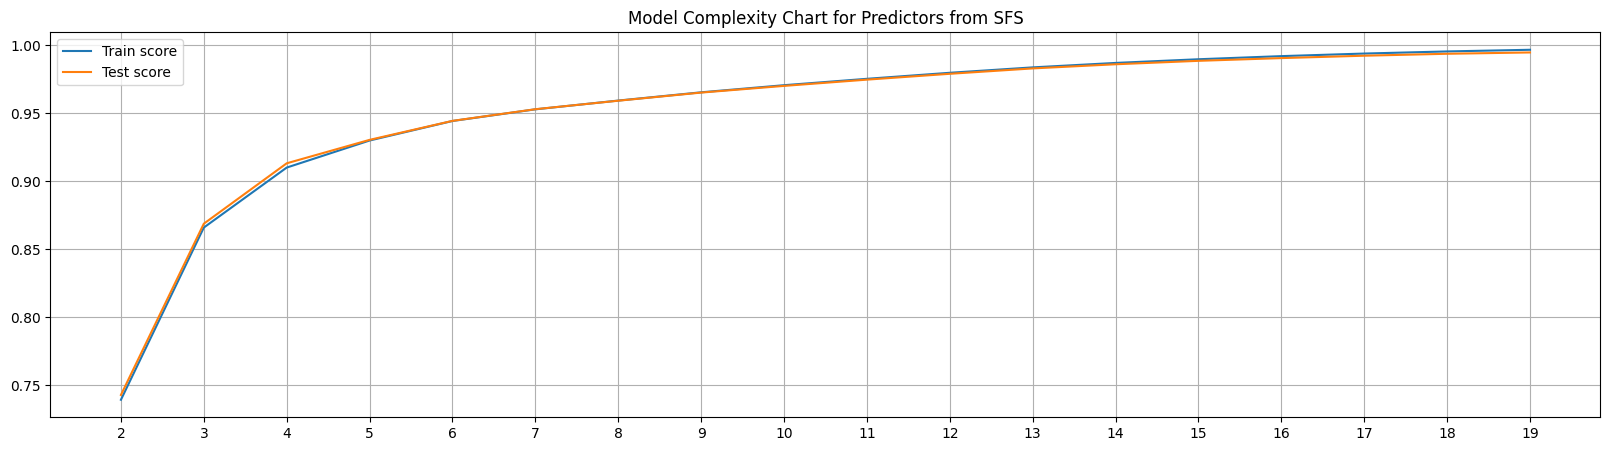

In [46]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.xticks(range(len(index)), index)
plt.title("Model Complexity Chart for Predictors from SFS")
plt.legend()
plt.grid()
plt.show()

In [47]:
DT = DecisionTreeRegressor(random_state = 0, max_depth = 3)
DT.fit(X_train_sfs, y_train)

print("Train Score:", DT.score(X_train_sfs,y_train))
print("Valid Score:", DT.score(X_test_sfs,y_test))

Train Score: 0.8658426802130142
Valid Score: 0.8686903339116505


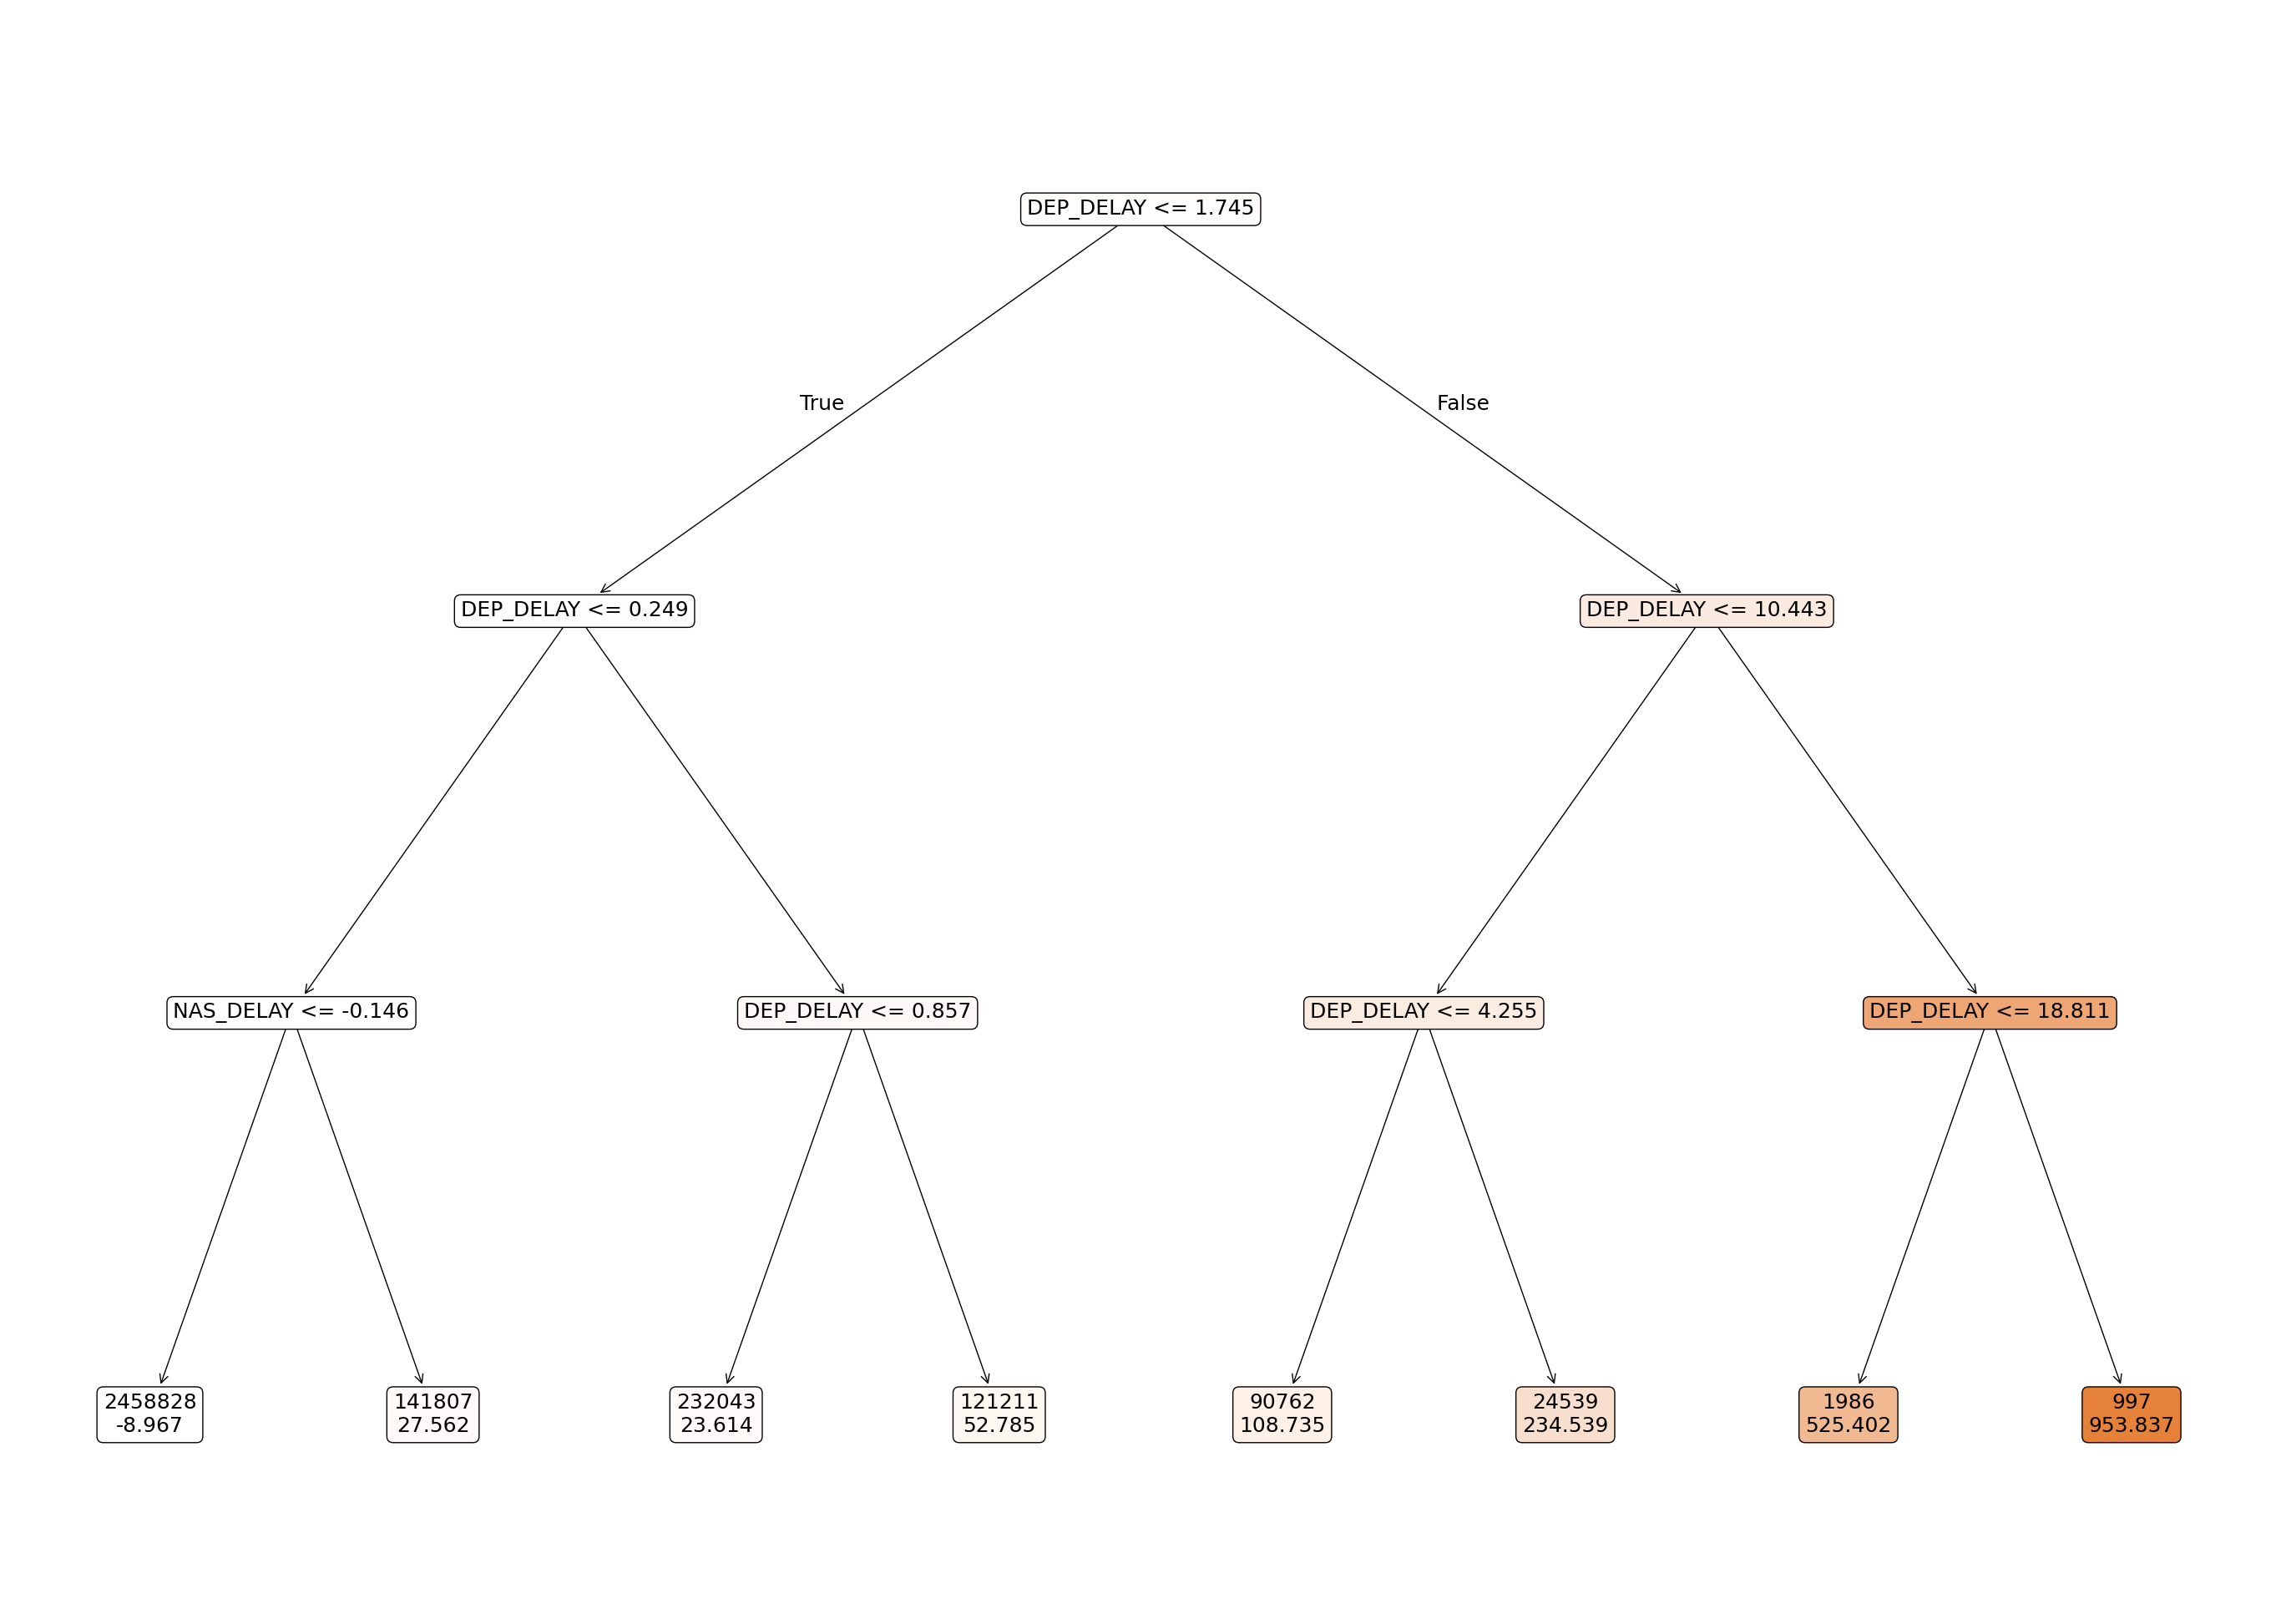

In [48]:
from sklearn import tree 

plt.subplots(figsize = (35,25))
tree.plot_tree(DT, 
               feature_names = X_train_sfs.columns,  
               filled=True,
               rounded = True,
              fontsize = 18,
              proportion = False,
              impurity = False,
              label = 'none')

ax = plt.gca()
for text in ax.texts:
    lines = text.get_text().split("\n")
    feature_only = [line for line in lines if any(f in line for f in X_train_sfs.columns)]
    if feature_only:
        text.set_text("\n".join(feature_only))
    else:
        continue

plt.show()

#### USING the predictors remaining after Mutiple Linear Regression that are significant

In [49]:
cols = X_MLR.columns

In [50]:
X_train_mlr = X_train[cols]
X_test_mlr = X_test[cols]

#### Linear Regression

In [51]:
LREG = LinearRegression()
LREG.fit(X_train_mlr,y_train)

print("Train Score:", LREG.score(X_train_mlr,y_train))
print("Test Score:", LREG.score(X_test_mlr,y_test))

Train Score: 0.9572969221128861
Test Score: 0.9577708044167156


In [52]:
LREG.coef_

array([17.7270607 ,  4.26983975,  2.44347256, -3.0259614 , 13.3000649 ,
        6.17162279,  8.84883102,  0.81309415, 12.48936593,  2.6314694 ,
        0.28945379, -3.85441131])

#### Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

train_1 = []
test_1 = []
index_1 = []

for j in range(2,20):
    dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = j)
    dt_reg.fit(X_train_mlr, y_train)
    train_1.append(dt_reg.score(X_train_mlr, y_train))
    test_1.append(dt_reg.score(X_test_mlr, y_test))
    index_1.append(j)

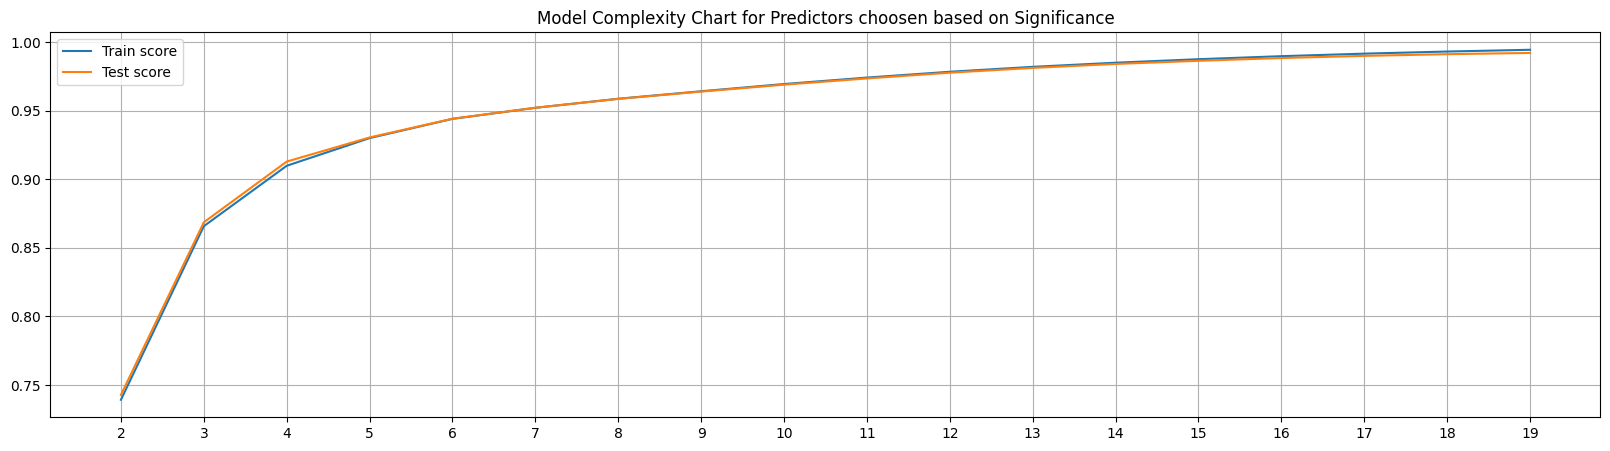

In [54]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index)),  train_1, label = 'Train score')
plt.plot(range(len(index)), test_1, label = 'Test score')
plt.xticks(range(len(index)), index_1)
plt.title("Model Complexity Chart for Predictors choosen based on Significance")
plt.legend()
plt.grid()
plt.show()

In [59]:
DT_1 = DecisionTreeRegressor(random_state = 0, max_depth = 13)
DT_1.fit(X_train_mlr, y_train)

print("Train Score:", DT_1.score(X_train_mlr,y_train))
print("Valid Score:", DT_1.score(X_test_mlr,y_test))

Train Score: 0.9821194317011686
Valid Score: 0.9813503397028278


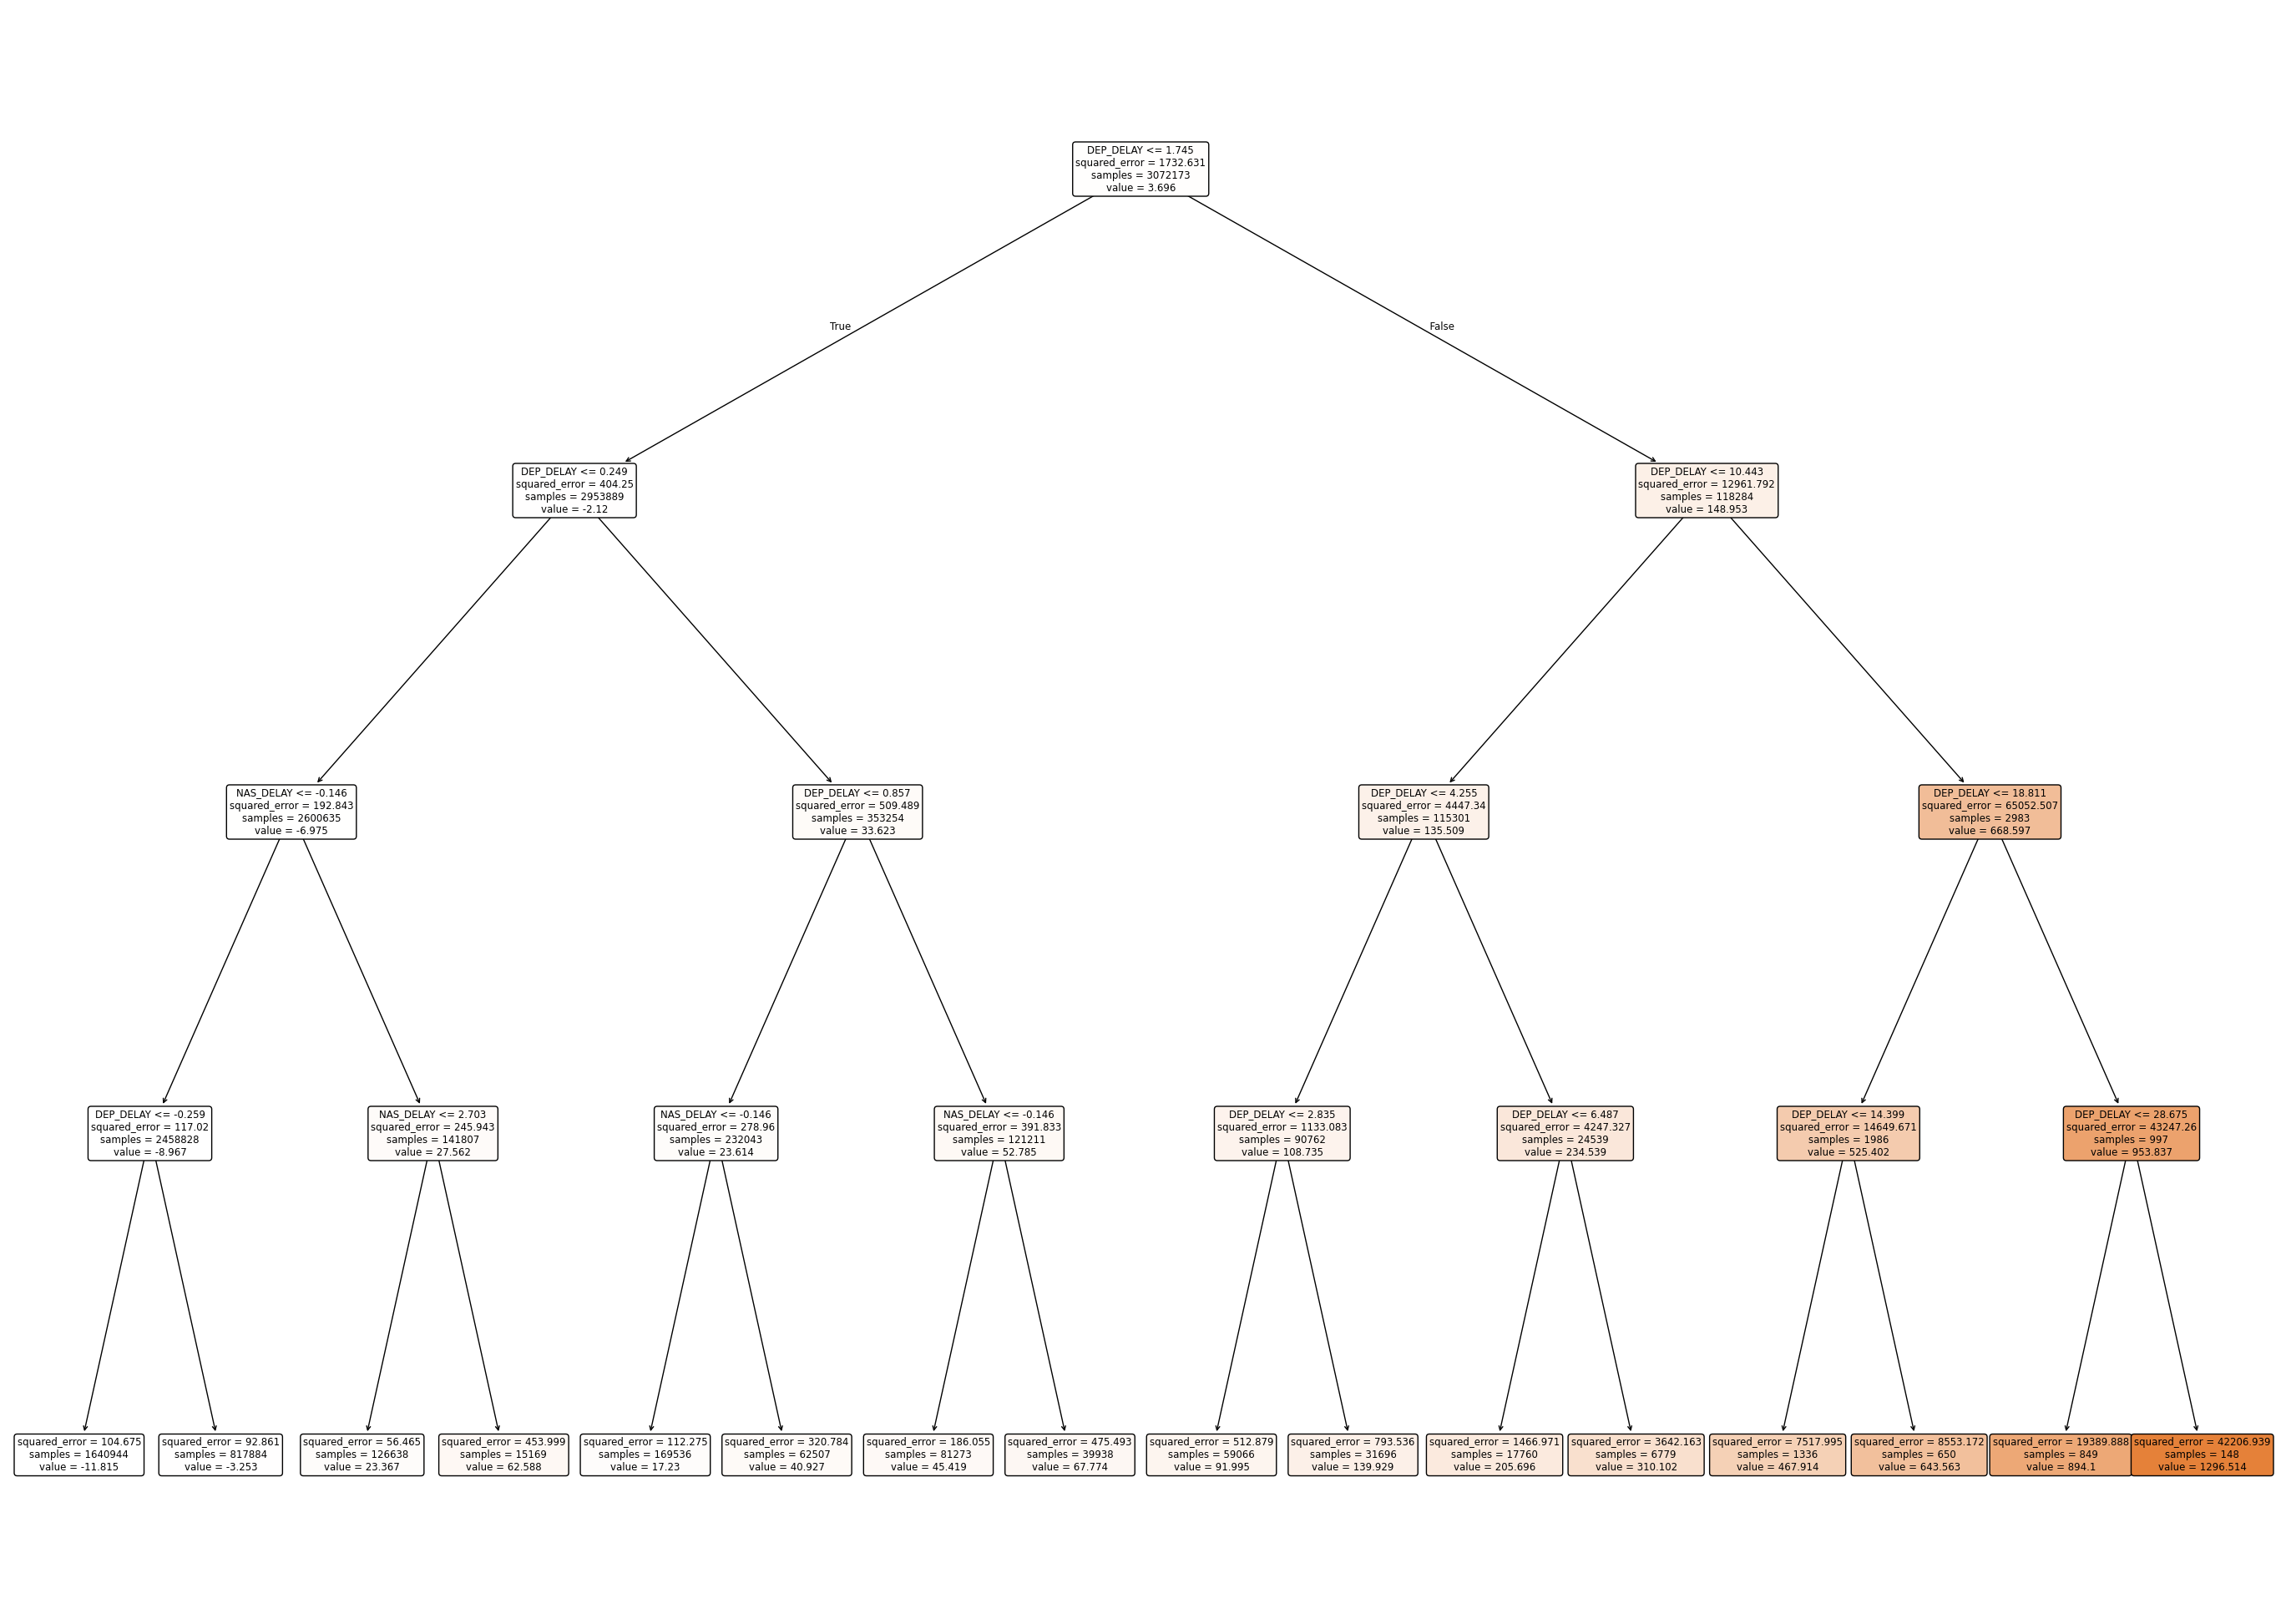

In [56]:
plt.subplots(figsize = (35,25))
tree.plot_tree(DT_1, 
               feature_names = X_train_mlr.columns,  
               filled=True,
               rounded = True, )

plt.show()

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def glance(model, X, y):
    # Make predictions
    predictions = model.predict(X)
    
    # Calculate metrics
    r_squared = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)  # Calculate RMSE
    mae = mean_absolute_error(y, predictions)
    
    # Create a DataFrame with the results
    return pd.DataFrame({
        "Model": [model.__class__.__name__],
        "R²": [r_squared],
        "MSE": [mse],
        "RMSE": [rmse],
        "MAE": [mae]
    })

In [58]:
# Use the glance function
results_df = pd.concat([
    glance(lreg,X_test_sfs,y_test),
    glance(DT,X_test_sfs,y_test),
    glance(LREG,X_test_mlr,y_test),
    glance(DT_1,X_test_mlr,y_test)
]).reset_index(drop=True)

# Display the results DataFrame
results_df

,Model,R²,MSE,RMSE,MAE
0,LinearRegression,0.962069,65.636063,8.101609,5.806640
1,DecisionTreeRegressor,0.868690,227.219272,15.073794,10.095135
2,LinearRegression,0.957771,73.073730,8.548317,6.262511
3,DecisionTreeRegressor,0.912983,150.574675,12.270887,8.616510
